# Visual Q&A Demo

## Setup
1-Installs required packages   
2-Downloads sample data and a pretrained model.     

In [2]:
using Pkg; Pkg.activate("."); Pkg.instantiate(); #install required packages
include("gqademosetup.jl")
include("src/main.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Demo setup is completed


update_with_gclip (generic function with 1 method)

In [19]:
include("src/main.jl")

update_with_gclip (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabularies).   
2-qvoc is the word dictionary for questions   
3-avoc is the word dictionary for answers   
4-Loads the pretrained model, and its hyper-parameters `o`.    

In [20]:
feats,qstsns,(qvoc,avoc) = loadDemoData("data/GQA2/gqa_demo/");
_,weights,o = loadmodel("models/gqaweights.jld2";onlywrun=true);
Mrun = copyto!(MACNetwork(o),weights)

Loading demo features ...
Loading demo questions ...
Loading dictionaries ...


MACNetwork(ImageUnit{Nothing,Linear}(FeatExtractor{Nothing}(nothing), Linear(Multiply{Param{Array{Float32,2}}}(input=2048 output=512), Bias{Param{Array{Float32,1}}}(length=512))), QUnit(Multiply{Param{Array{Float32,2}}}(input=2957 output=300), BiLSTM(LSTM{Param{Array{Float32,3}}, Nothing}(input=300,hidden=256,bidirectional))), Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=2048), Bias{Param{Array{Float32,1}}}(length=2048)), MAC(Control(nothing, Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=1), Bias{Param{Array{Float32,1}}}(length=1))), Read(Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=512), Bias{Param{Array{Float32,1}}}(length=512)), Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=512), Bias{Param{Array{Float32,1}}}(length=512)), Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=512), Bias{Param{Array{Float32,1}}}(length=512)), P(Array{Float32,2}(512,512)), Linear(Multiply{Param{Array{Float32,2}}}(input=512 output=1), Bias{Param{Arr

## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [279]:
rnd        = rand(1:length(qstsns)) # try 41
inst       = qstsns[rnd]
feat       = arrtype(permutedims(feats[:,:,rnd:rnd],(1,3,2)))
question   = map(x->get(qvoc,x,"<UNK>"),inst["question"]) 
answer     = get(avoc,inst["answer"],"<UNK>")
family     = 1
objectsNum = inst["objectsNum"]
results, prediction, interoutputs = singlerun(Mrun,feat,question;p=o[:p], objectnum=objectsNum);
answer==prediction[1]

true

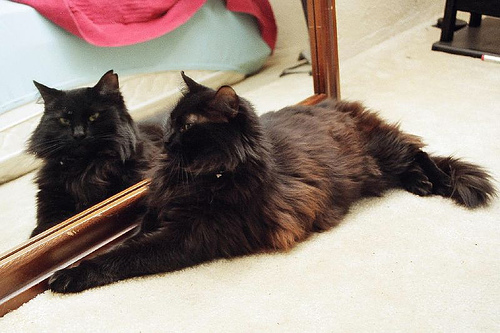

In [281]:
img = load("data/GQA2/gqa_demo/images/$(inst["imageId"]["id"]).jpg")

In [282]:
textq  = qvoc[question];
println("Question: ",join(textq," "))
texta  = avoc[answer];
println("Answer: $(texta)\nPrediction: $(avoc[prediction]) ")

Question: which kind of furniture is reflected in the mirror
Answer: bed
Prediction: ["bed"] 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [283]:
userinput = readline(stdin)
words = split(userinput) # tokenize(userinput)
question = [get(qvoc,wr,1) for wr in words]
results, prediction, interoutputs = singlerun(Mrun,feat,question;p=o[:p], objectnum=objectsNum);
println("Question: $(join(qvoc[question]," "))")
println("Prediction: $(avoc[prediction])")

stdin> where does the cat look at
Question: where does the cat look at
Prediction: ["mirror"]


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network
currently not working for faster r-cnn features.

In [ ]:
#visualize(img,results;p=o[:p])